In [208]:
%matplotlib inline
import ganymede
ganymede.configure('uav.beaver.works')
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import HTML, YouTubeVideo
import matplotlib.patches as patches
from matplotlib.lines import Line2D

In [3]:
ganymede.name('Spencer Ng')
def check(p): ganymede.update(p, True)
check(0)

https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line

*Note: All Khan Academy content is available for free at khanacademy.org*

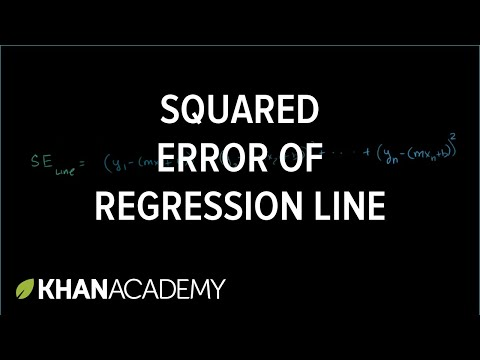

In [3]:
YouTubeVideo('6OvhLPS7rj4', width=560, height=315)

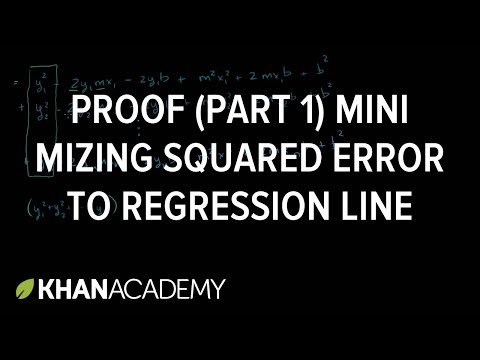

In [4]:
YouTubeVideo('mIx2Oj5y9Q8', width=560, height=315)

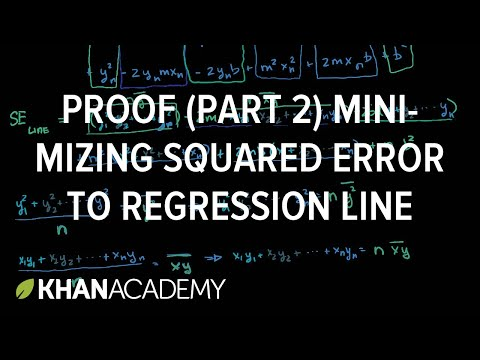

In [5]:
YouTubeVideo('f6OnoxctvUk', width=560, height=315)

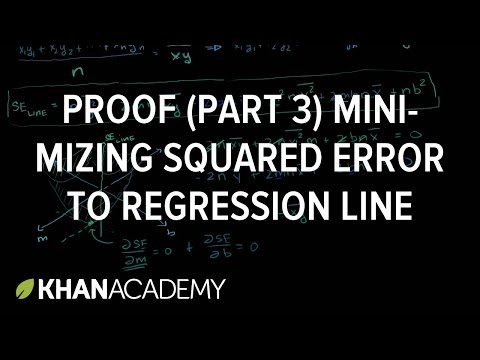

In [6]:
YouTubeVideo('u1HhUB3NP8g', width=560, height=315)

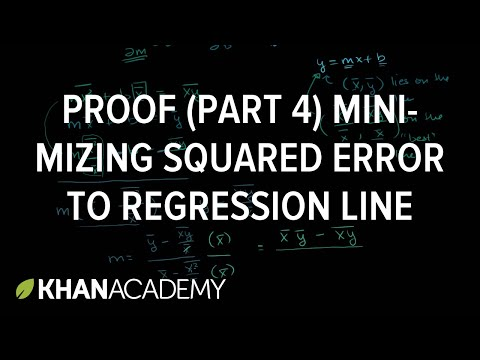

In [7]:
YouTubeVideo('8RSTQl0bQuw', width=560, height=315)

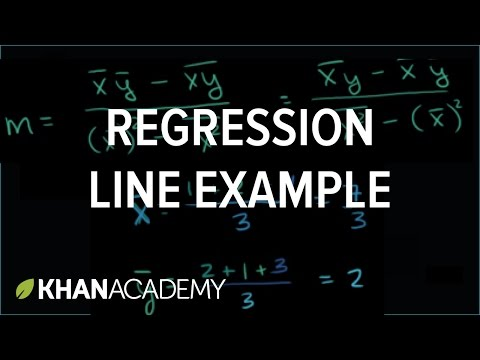

In [8]:
YouTubeVideo('GAmzwIkGFgE', width=560, height=315)

**The last video is optional**

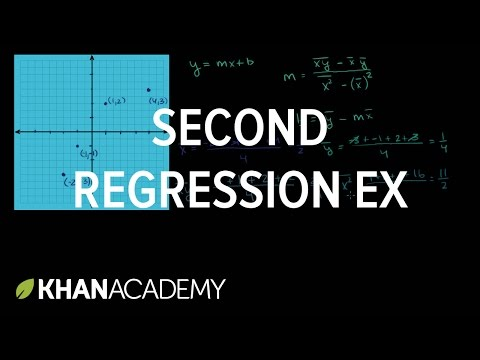

In [9]:
YouTubeVideo('ww_yT9ckPWw', width=560, height=315)

(215, 209)


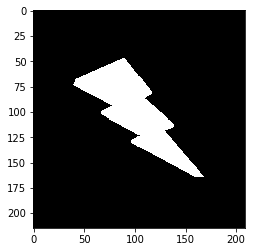

In [179]:
lightningbolt = cv2.imread('lightningbolt.png', cv2.IMREAD_GRAYSCALE)
_, lightningbolt = cv2.threshold(lightningbolt,150,255,cv2.THRESH_BINARY)
print(lightningbolt.shape)
fig,ax = plt.subplots()
ax.imshow(lightningbolt, cmap='gray');

In [ ]:
np.argwhere?

In [177]:
bolt = np.argwhere(lightningbolt)
bolt

array([[  0,  12],
       [  0,  14],
       [  0,  15],
       ..., 
       [214, 191],
       [214, 192],
       [214, 193]])

## Linear Regression

$$m = \frac{\bar{x}\bar{y} - \overline{xy}}{(\bar{x})^2 - \overline{x^2}}$$

$$b = \bar{y} - m\bar{x}$$

## Question: how can we extract the xs and ys separately from the result of argwhere?

Hint: review numpy slicing by columns and rows

In [178]:
xs = bolt[:, 1]
ys = bolt[:, 0]

## Question: Why would we want to convert x and y points from int values to floats?

Solving for `m` and `b` in the derived equations for linear regression involves division. If the types of the x and y points are `int`s rather than `float`s, integer division will be formed, such that excuting an operation like `5/2` will yield `2` instead of `2.5`.

In [183]:
def y(x,m,b):
    return m*x+b
def x(y,m,b):
    return (y-b)/m

def calculate_regression(points):
    points = points.astype(float)
    
    xs = points[:, 0]
    
    ys = points[:, 1]
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    
    xy_mean = np.mean(xs*ys)

    x_squared_mean = np.mean(xs**2)
    
    m = (x_mean*y_mean-xy_mean)/(x_mean**2-x_squared_mean)
    b = y_mean-m*x_mean
    return (m,b)


def calc_y_error(points, m, b):
    error = 0
    for point in points:
        error += abs(y(point[1],m,b)-point[0])
    return error
def calc_x_error(points, m, b):
    error = 0
    for point in points:
        error += abs(x(point[0],m,b)-point[1])
    return error

The intercept we calculated, $b$, may be outside of the pixel space of the image, so we must find two points inside of pixel space, $(x_1, y_1)$ and $(x2, y2)$ which will allow us to plot our regression line on the image. It may be best to choose points on the regression line which also occur on the boundaries/extrema of the image.

In [205]:
def find_inliers(m, b, shape):
    y1 = 0
    x1 = x(y1, m,b)
    y2 = shape[0]
    x2=x(y2,m,b)
    return x1,y1,x2,y2


(146, 125)


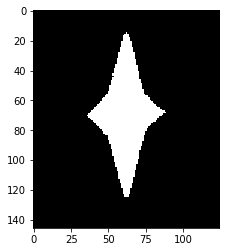

In [174]:
star = cv2.imread('squishedstar.png', cv2.IMREAD_GRAYSCALE)
print(star.shape)

_, star = cv2.threshold(star,125,255,cv2.THRESH_BINARY)
fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');

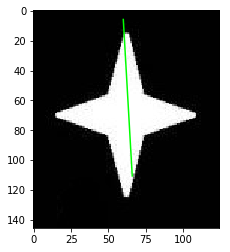

In [195]:

points =np.argwhere(star)
m,b = calculate_regression(points)

x1,y1,x2,y2 = find_inliers(m,b, star.shape)

fig,ax = plt.subplots()

    
ax.imshow(star, cmap='gray');
regression = Line2D([y1,y2],[x1,x2], color='lime')
ax.add_line(regression);

## TODO

1. Run your linear regression algorithm on the following images. 
2. Plot each of the results. 
3. Include each result in your submitted PDF.

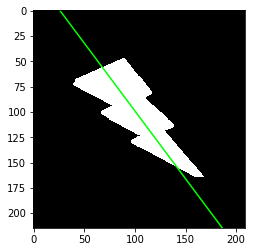

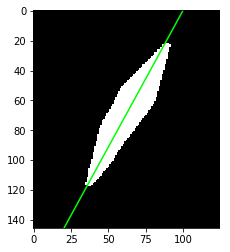

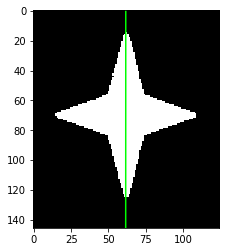

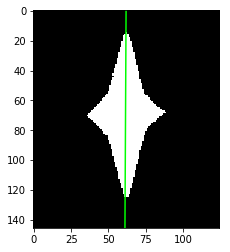

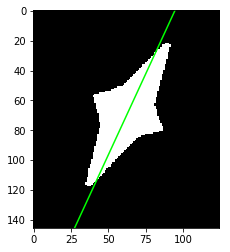

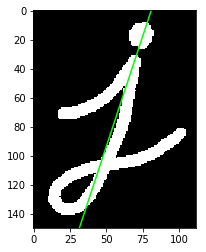

In [207]:
lightningbolt      = cv2.imread('lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

for image in images:
    _, image = cv2.threshold(image,125,255,cv2.THRESH_BINARY)
    points =np.argwhere(image)
    fig,ax = plt.subplots()
    m,b = calculate_regression(points)

    x1,y1,x2,y2 = find_inliers(m,b, image.shape)
    ax.imshow(image, cmap='gray');
    regression = Line2D([y1,y2],[x1,x2], color='lime')
    ax.add_line(regression)


## When you are done:

You should have six images with regression lines plotted on top of them.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 

## Stretch goal

*Your first machine learning algorithm!*

**Ran**dom **Sa**mple **C**onsensus, commonly referred to as *RanSaC*, is one of the most widely used machine learning algorithms. In essence, it is a 'guess and check' algorithm. Take a small random sample of your data - two points in this case. Next, define a line through those two points. After doing so, count the number of *inliers*, or points closest to that line (euclidean distance is one way to do this). Try to 

https://en.wikipedia.org/wiki/Random_sample_consensus

Implement RANSAC for linear regression, and run it on all of your images.

In [160]:
import random as rand
import math
def ransac(points, max_iters=100, 
           min_points=2, threshold = 10):
    master_points = points
    best_m = None
    best_b= None
    best_err = 10000000
    for i in range(max_iters):
        points = master_points.astype(float)
        pos_inliers = []
        for j in range(min_points):
            index = rand.randint(0,len(points)-1)
            pos_inliers.append(points[index])
            np.delete(points, points[index])
        dy = pos_inliers[0][1]-pos_inliers[1][1]
        dx = pos_inliers[0][0]-pos_inliers[1][0]
        if dx==0:
            #can't divide by zero
            continue
        m=dy/dx
        b=-m*pos_inliers[0][0]+pos_inliers[0][1]
        error = 0
        for point in points:
            abs_dist = float(abs(-m*point[1]+point[0]-b))/math.sqrt(m**2+1)
            if abs_dist > threshold:
                error+=1
        if error < best_err:
            best_m = m
            best_b = b
            best_err = error
    return (best_m,best_b)
    

1.0 2.0
-2.0 0 213.0 215
-1.91666666667 189.25
98.7391304348 0 22.5652173913 146
23.0 -1399.0
60.8260869565 0 67.1739130435 146
-20.0 1268.0
63.4 0 56.1 146
-2.0 195.0
97.5 0 24.5 146
-4.25 334.5
78.7058823529 0 43.4117647059 150


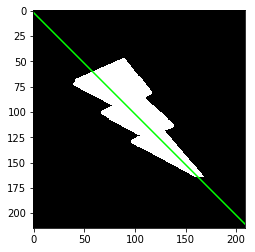

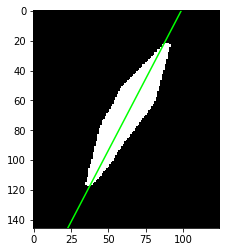

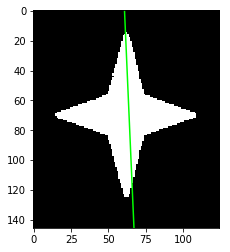

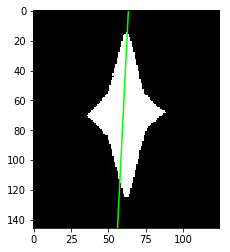

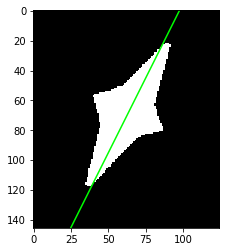

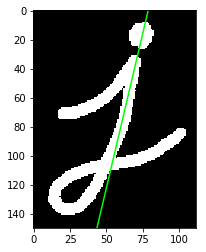

In [206]:
for i in range(len(images)):
    fig,ax = plt.subplots()
    image  = images[i]
    _,image = cv2.threshold(image,125,255,cv2.THRESH_BINARY)
    m,b = ransac(np.argwhere(image), max_iters=500, threshold=5)
    print(m,b)
    x1,y1,x2,y2 = find_inliers(m,b, image.shape)
    print(x1,y1,x2,y2)
    ax.imshow(image, cmap='gray');
    regression = Line2D([x1,x2],[y1,y2], color='lime')
    ax.add_line(regression)